# Test of the Ben Sira package
## Import :

In [1]:
from pkg.Variant import VariantsFinder
from pkg.Witness import Witness

[nltk_data] Downloading package punkt to /home/mari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /home/mari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Constantes :

To update depending of the manuscript :

In [2]:
UNWANTED_TAGS = ["folio","verse_nb","line","vacat_car","greek","reconstructed","superscript",\
                    "supralinear","margin_reconstructed","margin_car","margin_infralinear",\
                    "margin_supralinear","Article"]

TO UNDERSTAND THE XML FILES :

                <!ELEMENT folio (#PCDATA)> <!-- shelfmark of the manuscript and folio number -->
                <!ELEMENT verse_nb (#PCDATA)> <!-- verse (children of chapter) -->
                <!ELEMENT line (#PCDATA)> <!-- line on the manuscript -->
                <!ELEMENT vacat_car (#PCDATA)> <!-- a space into the manuscript -->
                <!ELEMENT greek (#PCDATA)> <!-- greek word or letter -->
                <!ELEMENT reconstructed (#PCDATA)> <!-- Hebrew reconstructed -->
                <!ELEMENT superscript (#PCDATA)> <!-- Hebrew superscript letters or words -->
                <!ELEMENT supralinear (#PCDATA)> <!-- Hebrew supralinear letters or words (I think = superscript) -->
                <!ELEMENT margin_reconstructed (#PCDATA)> <!-- marginal notation reconstructed -->
                <!ELEMENT margin_car (#PCDATA)> <!-- marginal notation -->
                <!ELEMENT margin_infralinear (#PCDATA)> <!-- marginal notation -->
                <!ELEMENT margin_supralinear (#PCDATA)> <!-- marginal notation -->

## Exemples :

In [3]:
fileNames = ["ms_a_new.xml","ms_b_new.xml","ms_d_new.xml","ms_e_new.xml","ms_f_new.xml"]
folder = "WorkDir/"

First we create a `VariantsFinder` object. At this creation, the object will match all chapters and verses, clean the verses and compute the collations and the distances for each verses :

In [4]:
vf = VariantsFinder(fileNames, UNWANTED_TAGS, folder = folder)

# Matching Done
## Cleaning Done
### Collation Done
#### Distance Done


We give a random exemple. It is important to note that the representation use here is simple_SVG, the normal SVG generating a lot of unwanted errors.

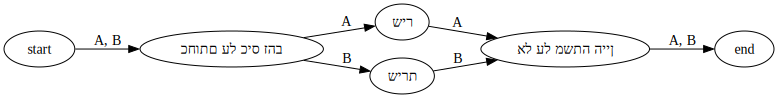

In [5]:
vf.getSampleVariant()

The following exemple will run on the first witness, to test the different representation.

In [6]:
test = vf.witnesses[1]
print(test)

Verse 29 : aligned
+---+-----+--------------------------------+-----------+
| A |     | מרשיע נפשו מי יצדיקנו ומי יכבד | מקלה נפשו |
| B | בני | מרשיע נפשו מי יצדיקנו ומי יכבד | מ         |
+---+-----+--------------------------------+-----------+


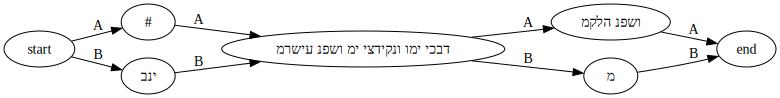

In [7]:
test.getSVG()

In [8]:
test.getHTML()

A,,מרשיע נפשו מי יצדיקנו ומי יכבד,מקלה נפשו
B,בני,מרשיע נפשו מי יצדיקנו ומי יכבד,מ


In [9]:
print(test.getCSV())

A, ,מרשיע נפשו מי יצדיקנו ומי יכבד ,מקלה נפשו 
B,בני ,מרשיע נפשו מי יצדיקנו ומי יכבד ,מ



The following exemple show the DataFrame of the `VariantsFinder` object.

In [10]:
df = vf.getDF()
df

,Verse A,Verse B,Manuscript A,Manuscript B,Chapter A,Chapter B,Verse,Levenshtein,Hamming
0,בין אחים ראשם נכבד וירא אלהים בעינ,בין אחים ראשם נכבד וירא אלהים נכבד ממנו,ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,20,6,8
1,מרשיע נפשו מי יצדיקנו ומי יכבד מקלה נפשו,בני מרשיע נפשו מי יצדיקנו ומי יכבד מ,ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,29,7,8
2,טוב עובד ויותר הון ממתכבד חס מתן,טוב עובד ויותר הון ממתכבד,ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,27,5,5
3,ש מושל ושופט נכבדו ואן גדול מרא אלהים,שר שופט ומושל נכבדו וא גד,ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,24,17,22
4,אַל תתחכם לעבד חפצך ואל תתכעת צרכך,אל תתחכם לעשות חפצך ואל תתכב,ms_a_new.xml,ms_b_new.xml,Chapter 10,Siracide 10,26,8,11
...,...,...,...,...,...,...,...,...,...
148,שונא תורה ומתמוטט כמסערה,לא יחכם שונא תורה ומתמוטט כמסערה,ms_e_new.xml,ms_f_new.xml,Chapter 33,Chapter 33,2,6,6
149,מת בחכמת ייי נשפטו ויש מהם מועד,אבל בחכמת ייי נשפטו ויש מהם מוע,ms_e_new.xml,ms_f_new.xml,Chapter 33,Chapter 33,8,4,6
150,אוהב שונא תחת כל יצהל,כסוס מוכן אוהב שונא תחת כל אוהב יצהל,ms_e_new.xml,ms_f_new.xml,Chapter 33,Chapter 33,6,12,12
151,ר ואחר תעשה ובית מנוח ואחר תגיה,הכין אומר ואחר תעשה ובית מנוח ואחר תגיה,ms_e_new.xml,ms_f_new.xml,Chapter 33,Chapter 33,4,7,8


Finally, here is an exemple of the mardown and csv export. By default, the variants are saved under the files `"Variants.md"` and `"Variants.csv"`.

In [12]:
vf.getCSV()
vf.getMarkdown()

(NoneType, NoneType)